# Data Visualisation

In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
import seaborn as sns
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import math
import json

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/tomjones/Documents/determining shot project/visualisation.csv')

/Users/tomjones/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,61,62,64,72,73,98,99,104,171,172,177,199,200,295,296) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Legnth of Shot

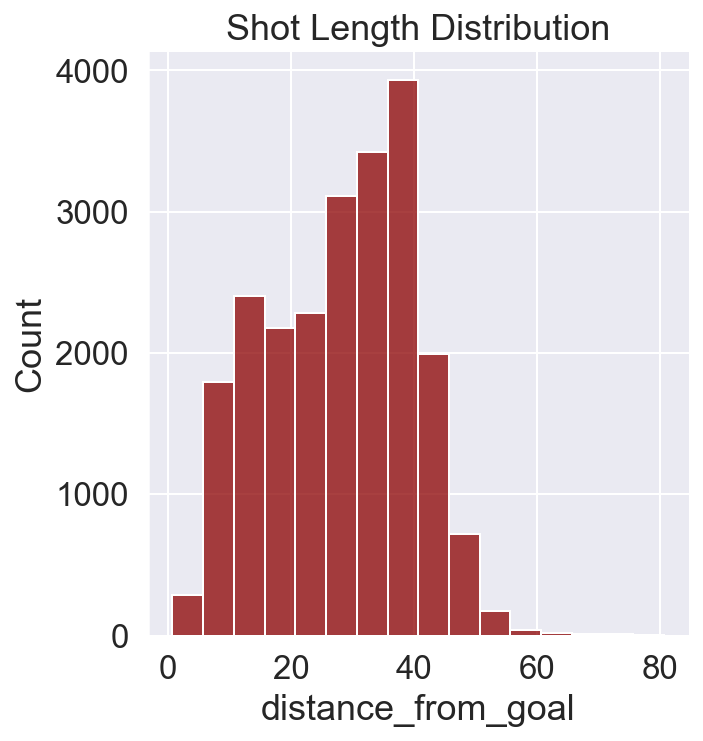

In [3]:
# plots the distruibtion of the length of shots
ax = sns.displot(df, x='distance_from_goal',binwidth=5, color = 'darkred')
ax.set(title='Shot Length Distribution')

In [4]:
# splits angles into bins of length 10 for visualisation of conversion rates in barplot
def split_distance(cell):
    if cell < 10:
        return '0>10'
    elif cell < 20:
        return '10>20'
    elif cell < 30:
        return '20>30'
    elif cell < 40:
        return '30>40'
    elif cell < 50:
        return '40>50'
    elif cell < 60:
        return '50>60'
    elif cell < 70:
        return '60>70'
    else:
        return '70>'

In [5]:
# applies function split_distance to distance from goal to split the shot length into bins
df['length_of_shot'] = df.distance_from_goal.apply(split_distance)

In [6]:
# creates dataframe of binned shot length and shot outcome
df_length = df[['length_of_shot','shot_outcome']]

In [7]:
# creates dataframe of mean shot outcome and binned shot length giving conversion rates
df_length_bar = df_length.groupby('length_of_shot').mean()

In [8]:
# renames shout_outcome to conversion rate
df_length_bar['Conversion Rate'] = df_length_bar['shot_outcome']
df_length_bar.drop(columns =['shot_outcome'], inplace = True )
# inserts column for index so bin names become their own column
df_length_bar = df_length_bar.reset_index(drop=False)

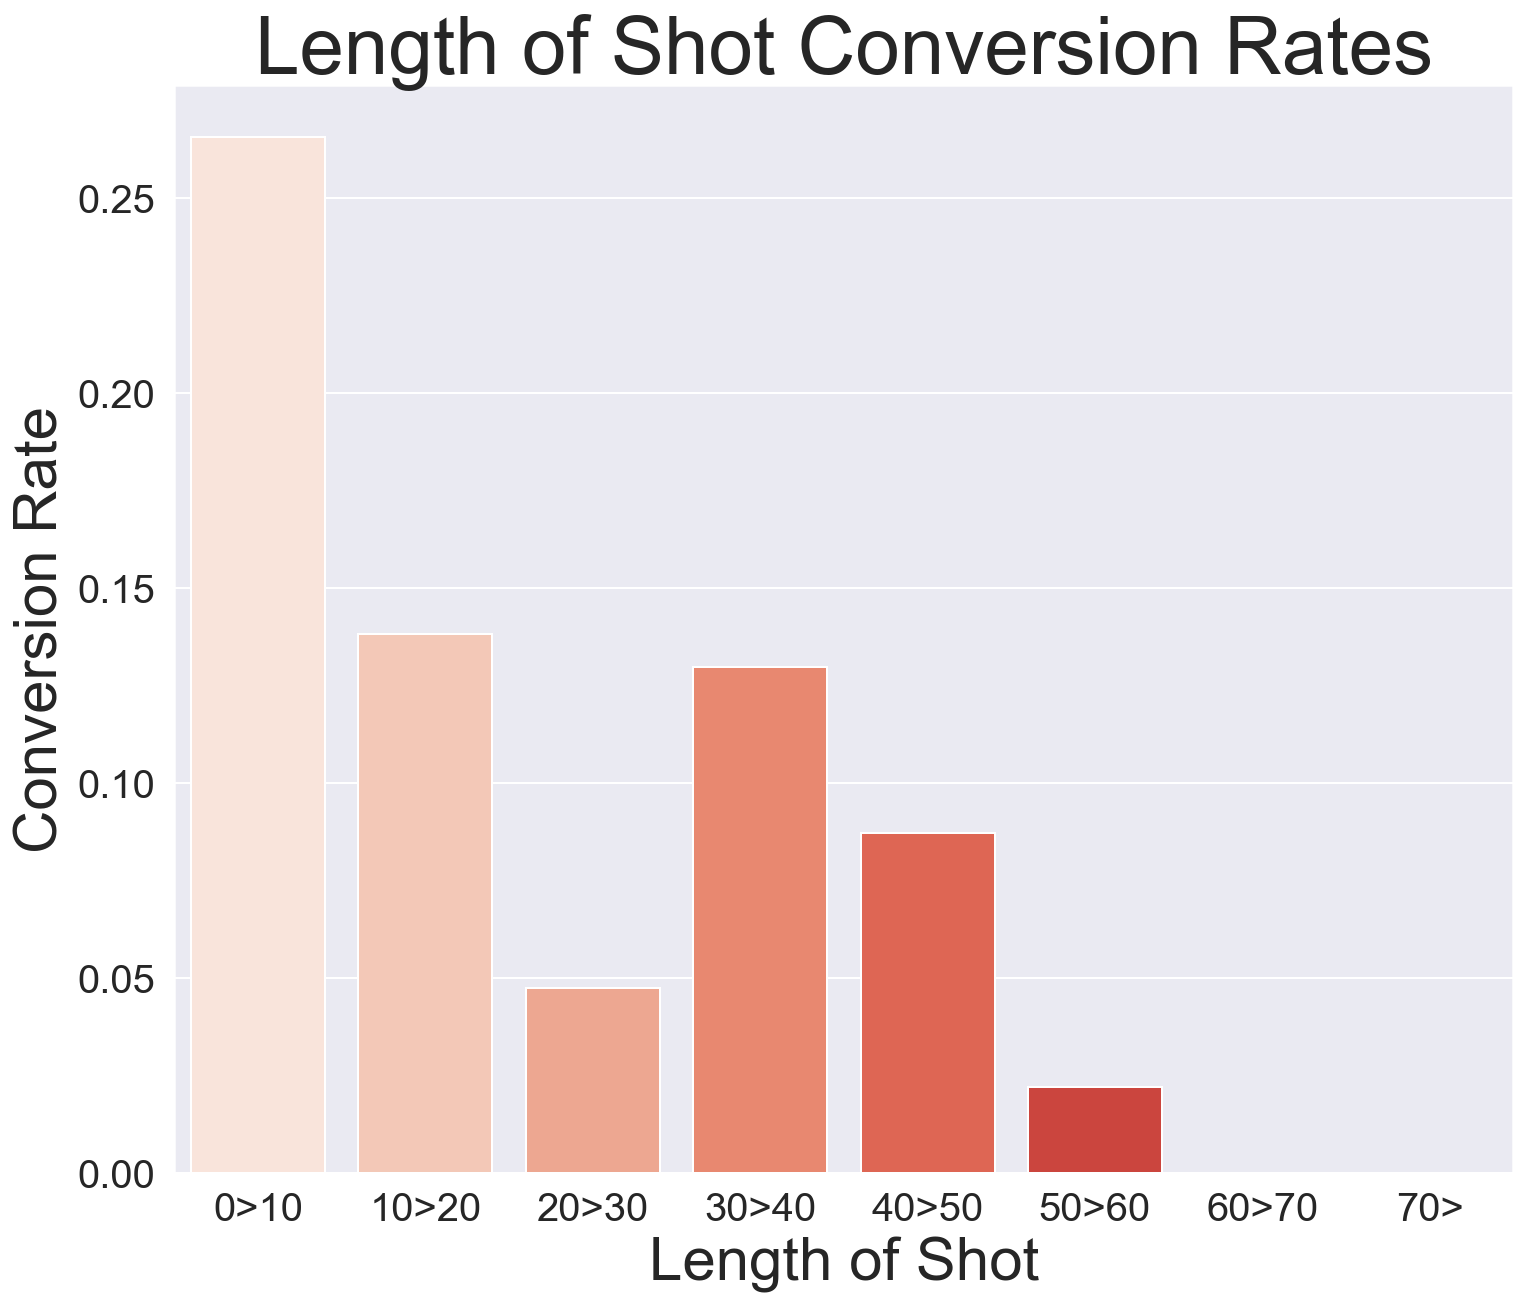

In [9]:
# plots bar plot of conversion rates for shot length
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x='length_of_shot', y='Conversion Rate', palette='Reds', data=df_length_bar)
ax.axes.set_title("Length of Shot Conversion Rates",fontsize=40)
ax.set_xlabel("Length of Shot",fontsize=30)
ax.set_ylabel("Conversion Rate",fontsize=30) 
ax.tick_params(labelsize=20)
plt.show()

In [10]:
# draws football pitch with shot length bins 
def draw_pitch_length(ax):
    #Pitch Outline & Centre Line
    Pitchg = Rectangle([0,0], width = 120, height = 80, fill = True,color="black")
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False,color="black")
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False,color="white")
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False, color="white")
    midline = ConnectionPatch([60,0], [60,80], "data", "data", color="white")
    
    # draw circle from goal for distance
    Circle1 = plt.Circle((0,40),10,color="linen", fill = True)
    Circle2 = plt.Circle((0,40),20,color="peachpuff",fill = True)
    Circle3 = plt.Circle((0,40),30,color="lightsalmon", fill = True)
    Circle4 = plt.Circle((0,40),40,color="darksalmon", fill = True)
    Circle5 = plt.Circle((0,40),50,color="indianred", fill = True)
    Circle6 = plt.Circle((0,40),60,color="firebrick", fill = True)
    Circle7 = plt.Circle((0,40),70,color="darkred", fill = True)

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False, color="white")
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False, color="white")


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="white", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="white")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="white")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="white")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="white")
    
    element = [Pitchg, Pitch, Circle7,Circle6, Circle5, Circle4, Circle3, Circle2, Circle1, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

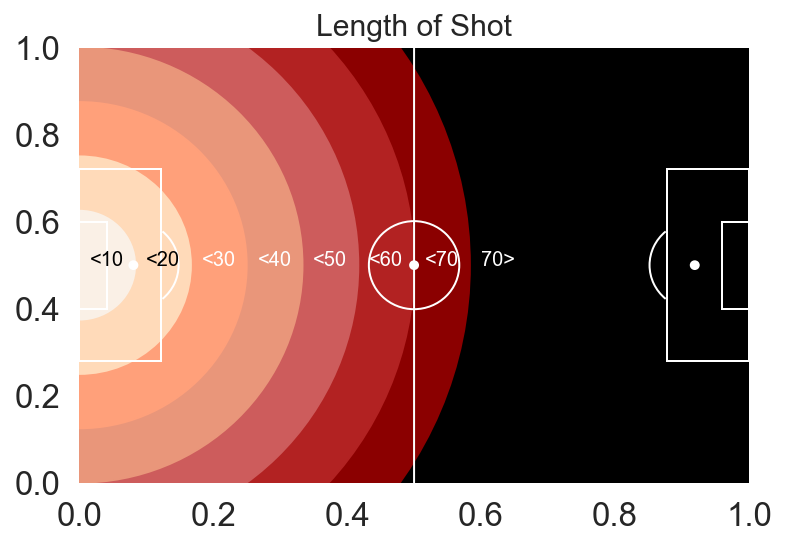

In [11]:
# plot football pitch with shot length bins using function above
fig, ax = plt.subplots()
ax=fig.add_subplot(1,1,1)
draw_pitch_length(ax) #overlay our different objects on the pitch
ax.axes.set_title("Length of Shot",fontsize=15)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')

# Adds distance labels to circles
plt.text(5, 40,'<10', horizontalalignment='center', color = 'black')
plt.text(15, 40,'<20', horizontalalignment='center', color = 'black')
plt.text(25, 40,'<30', horizontalalignment='center', color = 'white')
plt.text(35, 40,'<40', horizontalalignment='center', color = 'white')
plt.text(45, 40,'<50', horizontalalignment='center', color = 'white')
plt.text(55, 40,'<60', horizontalalignment='center', color = 'white')
plt.text(65, 40,'<70', horizontalalignment='center', color = 'white')
plt.text(75, 40,'70>', horizontalalignment='center', color = 'white')

plt.show()

# Shot location heatmap

In [12]:
# Creates dataframe of shot location on pitch and shot outcome
df_heat = df[['location','shot_outcome']]
df_heat = df_heat[df_heat['shot_outcome'] == 1]

In [13]:
# pulls out x co-ordinate for shot_end_location
def pull_x(cell):
    x = eval(cell)
    return x[0]

# pulls out y co-ordinate for shot_end_location
def pull_y(cell):
    y = eval(cell)
    return y[1]

In [14]:
# creates columns for x and y co-ordinates for kde plot
df_heat['x_location'] = df_heat.location.apply(pull_x)
df_heat['y_location'] = df_heat.location.apply(pull_y)

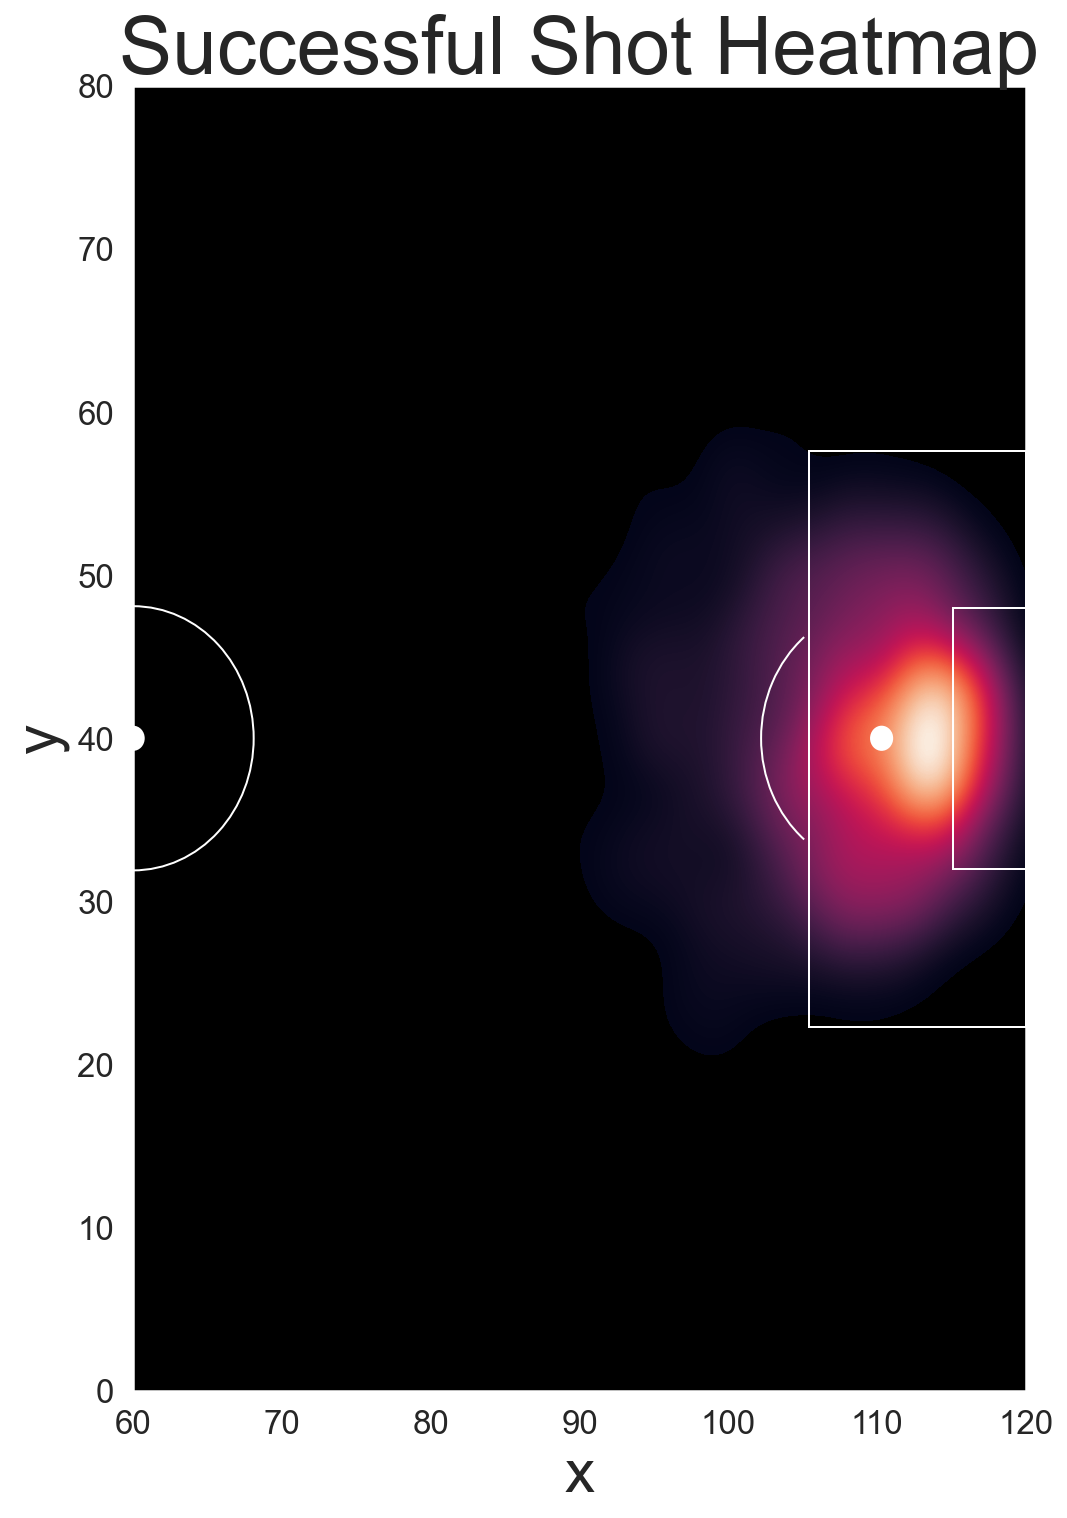

In [22]:
# plots kde plot for sucsessful shot locations
fig, ax = plt.subplots(figsize=(8, 12))
ax = sns.kdeplot(data=df_heat, x='x_location',y='y_location', levels=1000, fill=True, cmap = "rocket", zorder =2)
ax.set_title("Successful Shot Heatmap",fontsize=40)
ax.set_xlabel("x",fontsize=30)
ax.set_ylabel("y",fontsize=30)
# removes grid lines
ax.grid(False)
ax.patch.set_facecolor('black')

# Sets limit as half fd pitch
plt.ylim(0, 80)
plt.xlim(60, 120)


# adds pitch lines in white
RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False, color = 'white', zorder =3)
RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False, color = 'white', zorder =4)
centreCircle = plt.Circle((60,40),8.1,color="white", fill = False, zorder =5)
centreSpot = plt.Circle((60,40),0.71,color="white", zorder =6)
rightPenSpot = plt.Circle((110.3,40),0.71,color="white", zorder = 7)
rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="white", zorder =8)
ax.add_patch(RightPenalty) 
ax.add_patch(RightSixYard) 
ax.add_patch(centreCircle) 
ax.add_patch(centreSpot)
ax.add_patch(rightPenSpot)
ax.add_patch(rightArc)

plt.show()

# Angle to Goal

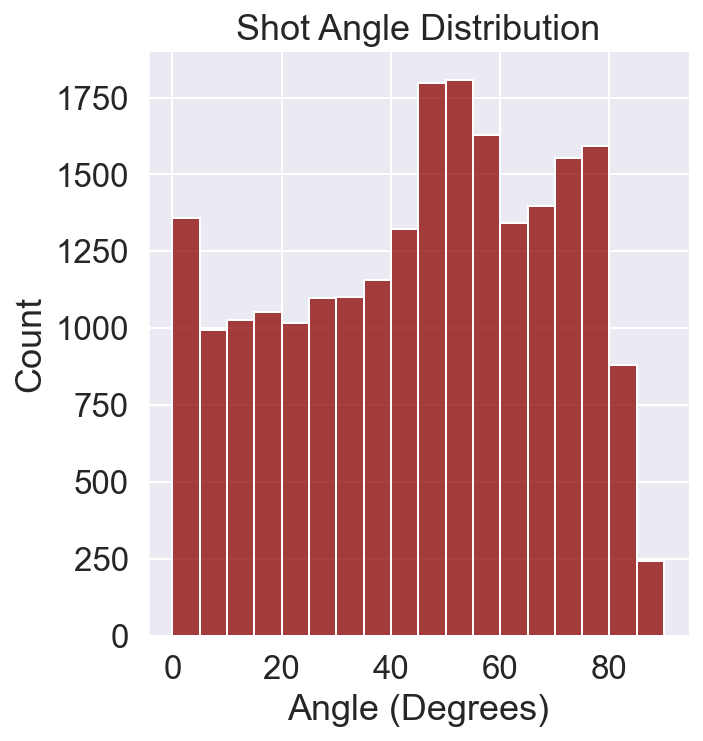

In [23]:
# plots the distribution of the angle of shots
ax = sns.displot(df, x='angle_of_shot',binwidth=5, color = 'darkred')
ax.set(title='Shot Angle Distribution')
ax.set(xlabel='Angle (Degrees)', ylabel='Count')

In [24]:
# splits angles into bin 10 degrees large
def split_angles(cell):
    if cell < 10:
        return '0>10'
    elif cell < 20:
        return '10>20'
    elif cell < 30:
        return '20>30'
    elif cell < 40:
        return '30>40'
    elif cell < 50:
        return '40>50'
    elif cell < 60:
        return '50>60'
    elif cell < 70:
        return '60>70'
    elif cell < 80:
        return '70>80'
    else:
        return '80>'

In [25]:
# creates column of binned angles
df['Angle to Goal'] = df.angle_of_shot.apply(split_angles)

In [26]:
# creates dataframe of angle from goal and shout outcome 
df_angle = df[['Angle to Goal','shot_outcome']]

In [27]:
# creates dataframe of mean shot outcome and binned shot angle giving conversion rates
df_angle_bar = df_angle.groupby('Angle to Goal').mean()
# inserts column for index so bin names become their own column
df_angle_bar = df_angle_bar.reset_index(drop=False)

In [28]:
# renames shout_outcome to conversion rate
df_angle_bar['Conversion Rate'] = df_angle_bar['shot_outcome']
df_angle_bar.drop(columns =['shot_outcome'], inplace = True )

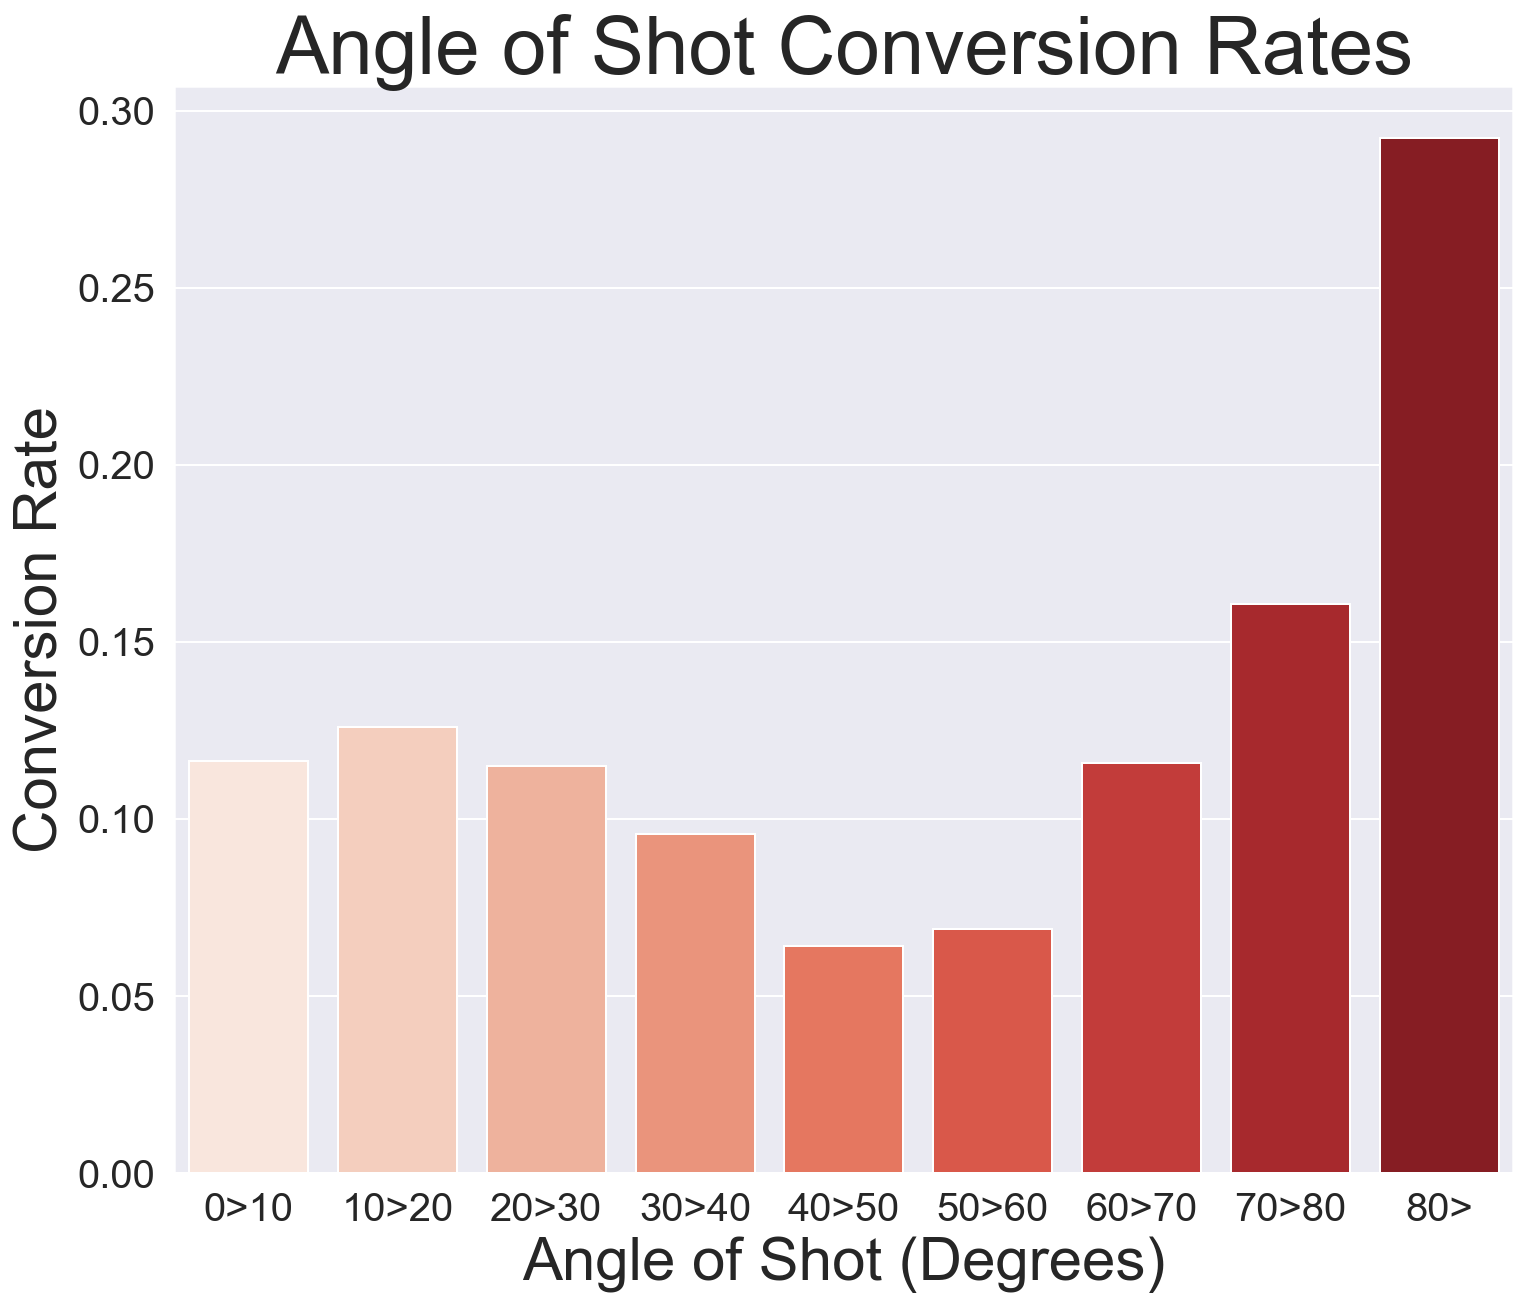

In [30]:
# plots bar plot of conversion rates for shot angle
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x='Angle to Goal', y='Conversion Rate', data=df_angle_bar, palette='Reds')
ax.set_title("Angle of Shot Conversion Rates",fontsize=40)
ax.set_xlabel("Angle of Shot (Degrees)",fontsize=30)
ax.set_ylabel("Conversion Rate",fontsize=30) 
ax.tick_params(labelsize=20)
plt.show()

In [34]:
# draws football pitch with shot angle bins
def draw_pitch_angle(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitchg = Rectangle([0,0], width = 120, height = 80, fill = True,color="maroon")
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False,color="black")
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False,color="white")
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False, color="white")
    midline = ConnectionPatch([60,0], [60,80], "data", "data", color="white")
    

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False, color="white")
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False, color="white")

    #triangles
    #top 10 degrees
    points1 = [[0, 40], [0, 80], [40*(math.tan(10 * math.pi / 180)), 80]]
    triangle1 = plt.Polygon(points1, color = 'linen')
    #bottom 10 degrees
    points1b = [[0, 40], [0, 0], [40*(math.tan(10 * math.pi / 180)), 0]]
    triangle1b = plt.Polygon(points1b, color = 'linen')
    #top 20 degrees
    points2 = [[0, 40], [0, 80], [40*(math.tan(20 * math.pi / 180)), 80]]
    triangle2 = plt.Polygon(points2, color = 'peachpuff')
    #bottom 20 degrees
    points2b = [[0, 40], [0, 0], [40*(math.tan(20 * math.pi / 180)), 0]]
    triangle2b = plt.Polygon(points2b, color = 'peachpuff')
    #top 30 degrees
    points3 = [[0, 40], [0, 80], [40*(math.tan(30 * math.pi / 180)), 80]]
    triangle3 = plt.Polygon(points3, color = 'lightsalmon')
    #bottom 30 degrees
    points3b = [[0, 40], [0, 0], [40*(math.tan(30 * math.pi / 180)), 0]]
    triangle3b = plt.Polygon(points3b, color = 'lightsalmon')
    #top 40 degrees
    points4 = [[0, 40], [0, 80], [40*(math.tan(40 * math.pi / 180)), 80]]
    triangle4 = plt.Polygon(points4, color = 'darksalmon')
    #bottom 40 degrees
    points4b = [[0, 40], [0, 0], [40*(math.tan(40 * math.pi / 180)), 0]]
    triangle4b = plt.Polygon(points4b, color = 'darksalmon')
    #top 50 degrees
    points5 = [[0, 40], [0, 80], [40*(math.tan(50 * math.pi / 180)), 80]]
    triangle5 = plt.Polygon(points5, color = 'salmon')
    #bottom 50 degrees
    points5b = [[0, 40], [0, 0], [40*(math.tan(50 * math.pi / 180)), 0]]
    triangle5b = plt.Polygon(points5b, color = 'salmon')
    #top 60 degrees
    points6 = [[0, 40], [0, 80], [40*(math.tan(60 * math.pi / 180)), 80]]
    triangle6 = plt.Polygon(points6, color = 'indianred')
    #bottom 60 degrees
    points6b = [[0, 40], [0, 0], [40*(math.tan(60 * math.pi / 180)), 0]]
    triangle6b = plt.Polygon(points6b, color = 'indianred')
    # top 70 degrees
    points7 = [[0, 40], [0, 80], [40*(math.tan(70 * math.pi / 180)), 80]]
    triangle7 = plt.Polygon(points7, color = 'firebrick')
    #bottom 70 degrees
    points7b = [[0, 40], [0, 0], [40*(math.tan(70 * math.pi / 180)), 0]]
    triangle7b = plt.Polygon(points7b, color = 'firebrick')
    #top 80 degrees
    points8 = [[0, 40], [0, 80], [40*(math.tan(80 * math.pi / 180)), 80]]
    triangle8 = plt.Polygon(points8, color = 'darkred')
    #bottom 80 degrees
    points8b = [[0, 40], [0, 0], [40*(math.tan(80 * math.pi / 180)), 0]]
    triangle8b = plt.Polygon(points8b, color = 'darkred')
    
    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="white", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="white")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="white")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="white")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="white")
    
    element = [Pitchg, Pitch, triangle8, triangle8b, triangle7, triangle7b, triangle6, triangle6b, triangle5, triangle5b, triangle4, triangle4b, triangle3, triangle3b, 
               triangle2, triangle2b, triangle1, triangle1b, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

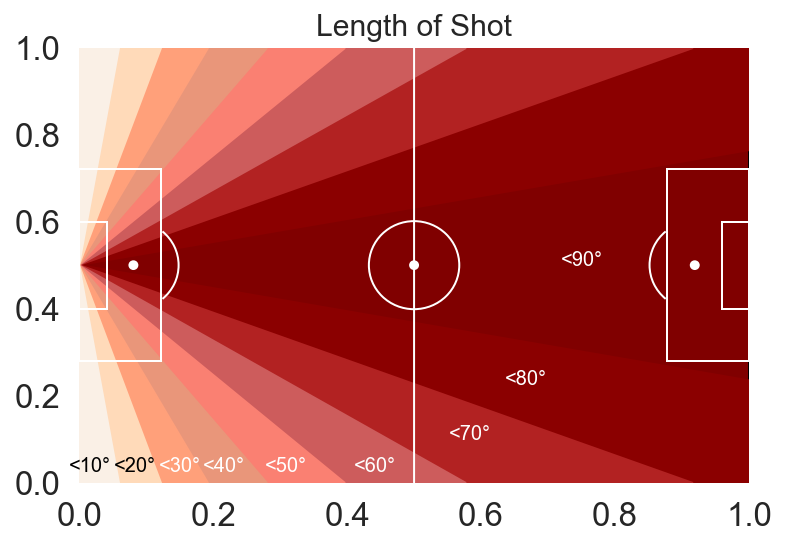

In [35]:
# plot football pitch with shot angle bins using function above
fig, ax = plt.subplots()
ax=fig.add_subplot(1,1,1)
draw_pitch_angle(ax) #overlay our different objects on the pitch
ax.axes.set_title("Length of Shot",fontsize=15)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')

# adds binned angle labels
plt.text(2, 2,'<10°', horizontalalignment='center', color = 'black')
plt.text(10, 2,'<20°', horizontalalignment='center', color = 'black')
plt.text(18, 2,'<30°', horizontalalignment='center', color = 'white')
plt.text(26, 2,'<40°', horizontalalignment='center', color = 'white')
plt.text(37, 2,'<50°', horizontalalignment='center', color = 'white')
plt.text(53, 2,'<60°', horizontalalignment='center', color = 'white')
plt.text(70, 8,'<70°', horizontalalignment='center', color = 'white')
plt.text(80, 18,'<80°', horizontalalignment='center', color = 'white')
plt.text(90, 40,'<90°', horizontalalignment='center', color = 'white')

plt.show()

# Defenders In Front of Goal

In [36]:
# creates dataframe of defenders in front of goal and shot outcome
df_def = df[['defenders_infront_of_goal','shot_outcome']]

In [37]:
# creates dataframe of mean shot outcome and number of defender in front of goal giving conversion rates
df_def_bar = df_def.groupby('defenders_infront_of_goal').mean()
# inserts column for index so number of defenders become their own column
df_def_bar = df_def_bar.reset_index(drop=False)

In [38]:
# renames shout_outcome to conversion rate
df_def_bar.columns = ['defenders_infront_of_goal', 'conversion_rate']

<ipython-input-39-f148e073fa63>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


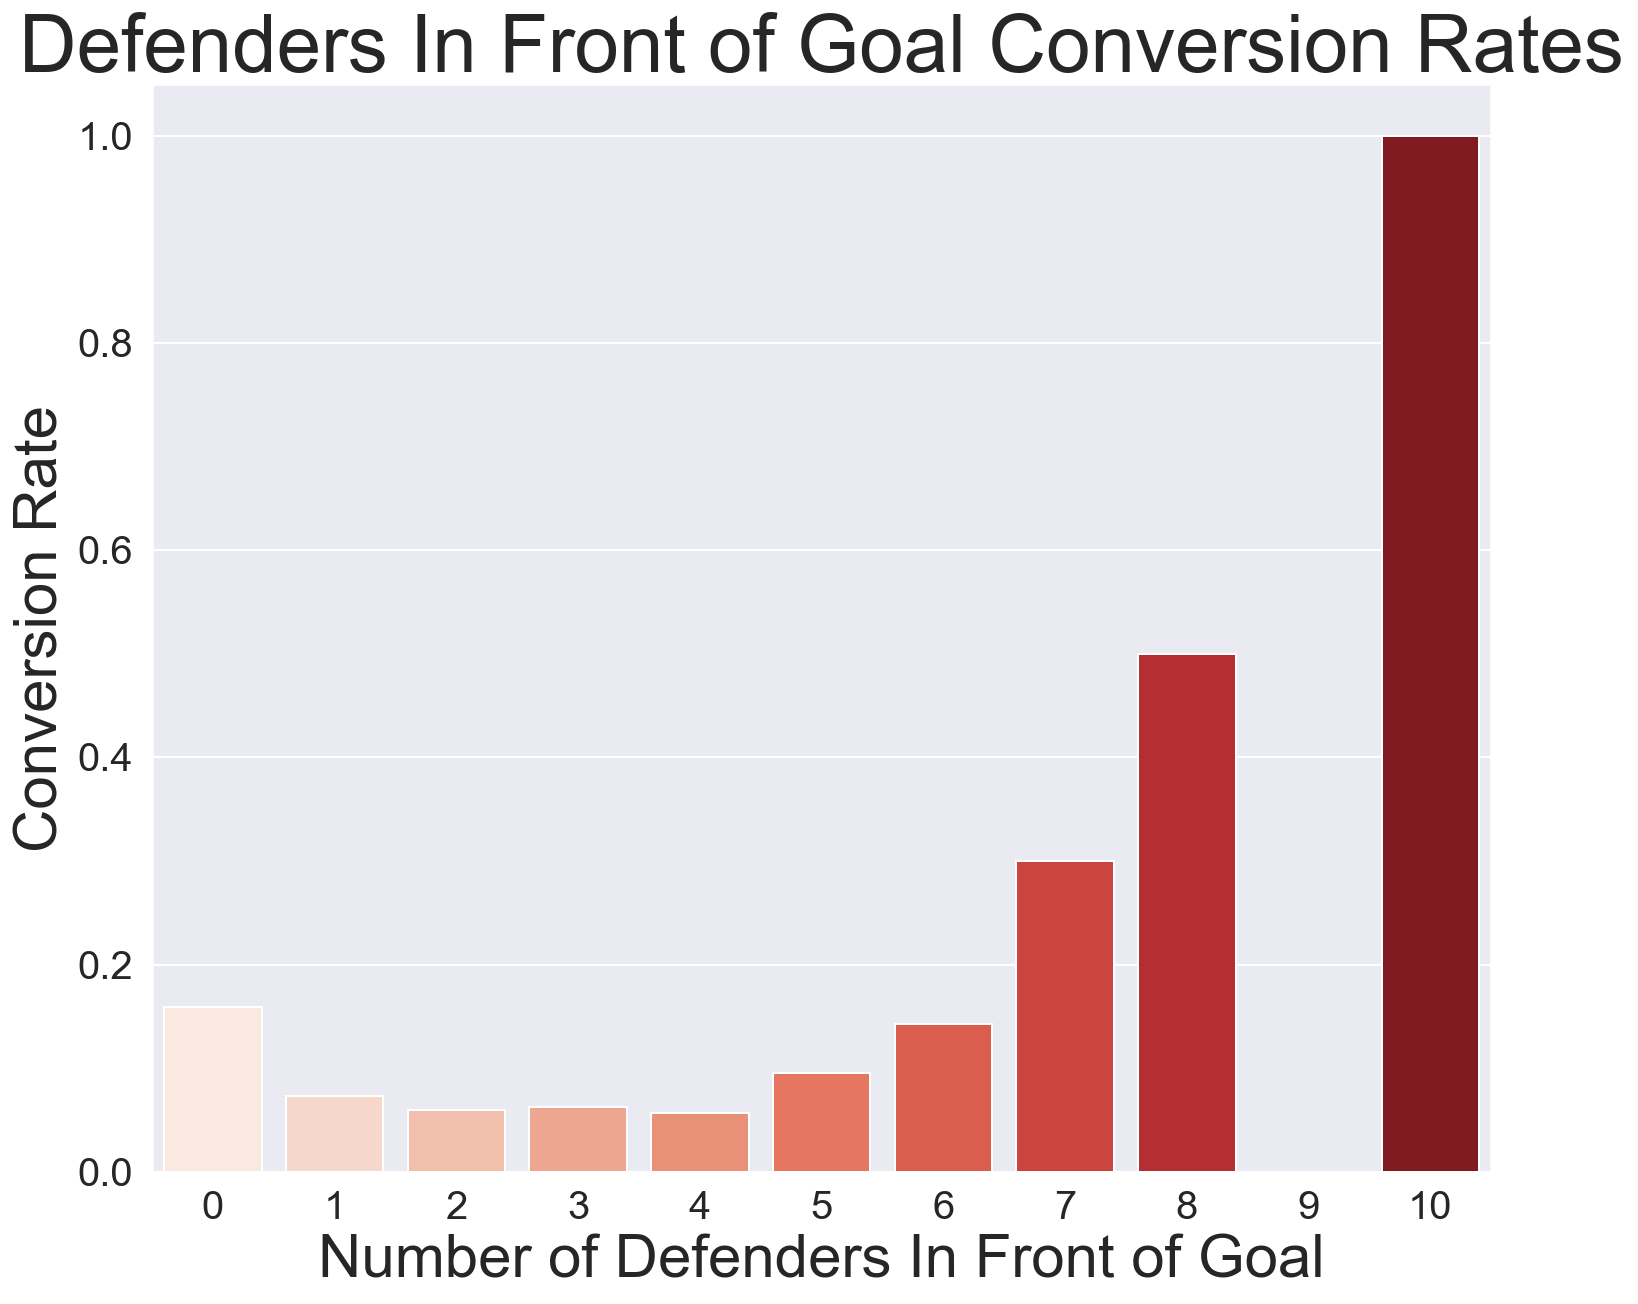

In [39]:
# plots bar plot of conversion rates for defeners in front of goal
ax=fig.add_subplot()
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x='defenders_infront_of_goal', y='conversion_rate', data=df_def_bar, palette='Reds')
ax.set_title("Defenders In Front of Goal Conversion Rates",fontsize=40)
ax.set_xlabel("Number of Defenders In Front of Goal",fontsize=30)
ax.set_ylabel("Conversion Rate",fontsize=30) 
ax.tick_params(labelsize=20)
plt.show()

In [40]:
# creates dataframe of count and number of defender in front of goal 
df_def_hist = df_def.groupby('defenders_infront_of_goal').count()
# inserts column for index so number of defenders become their own column
df_def_hist = df_def_hist.reset_index(drop=False)

In [41]:
# renames shout_outcome to count
df_def_hist.columns = ['defenders_infront_of_goal','count']

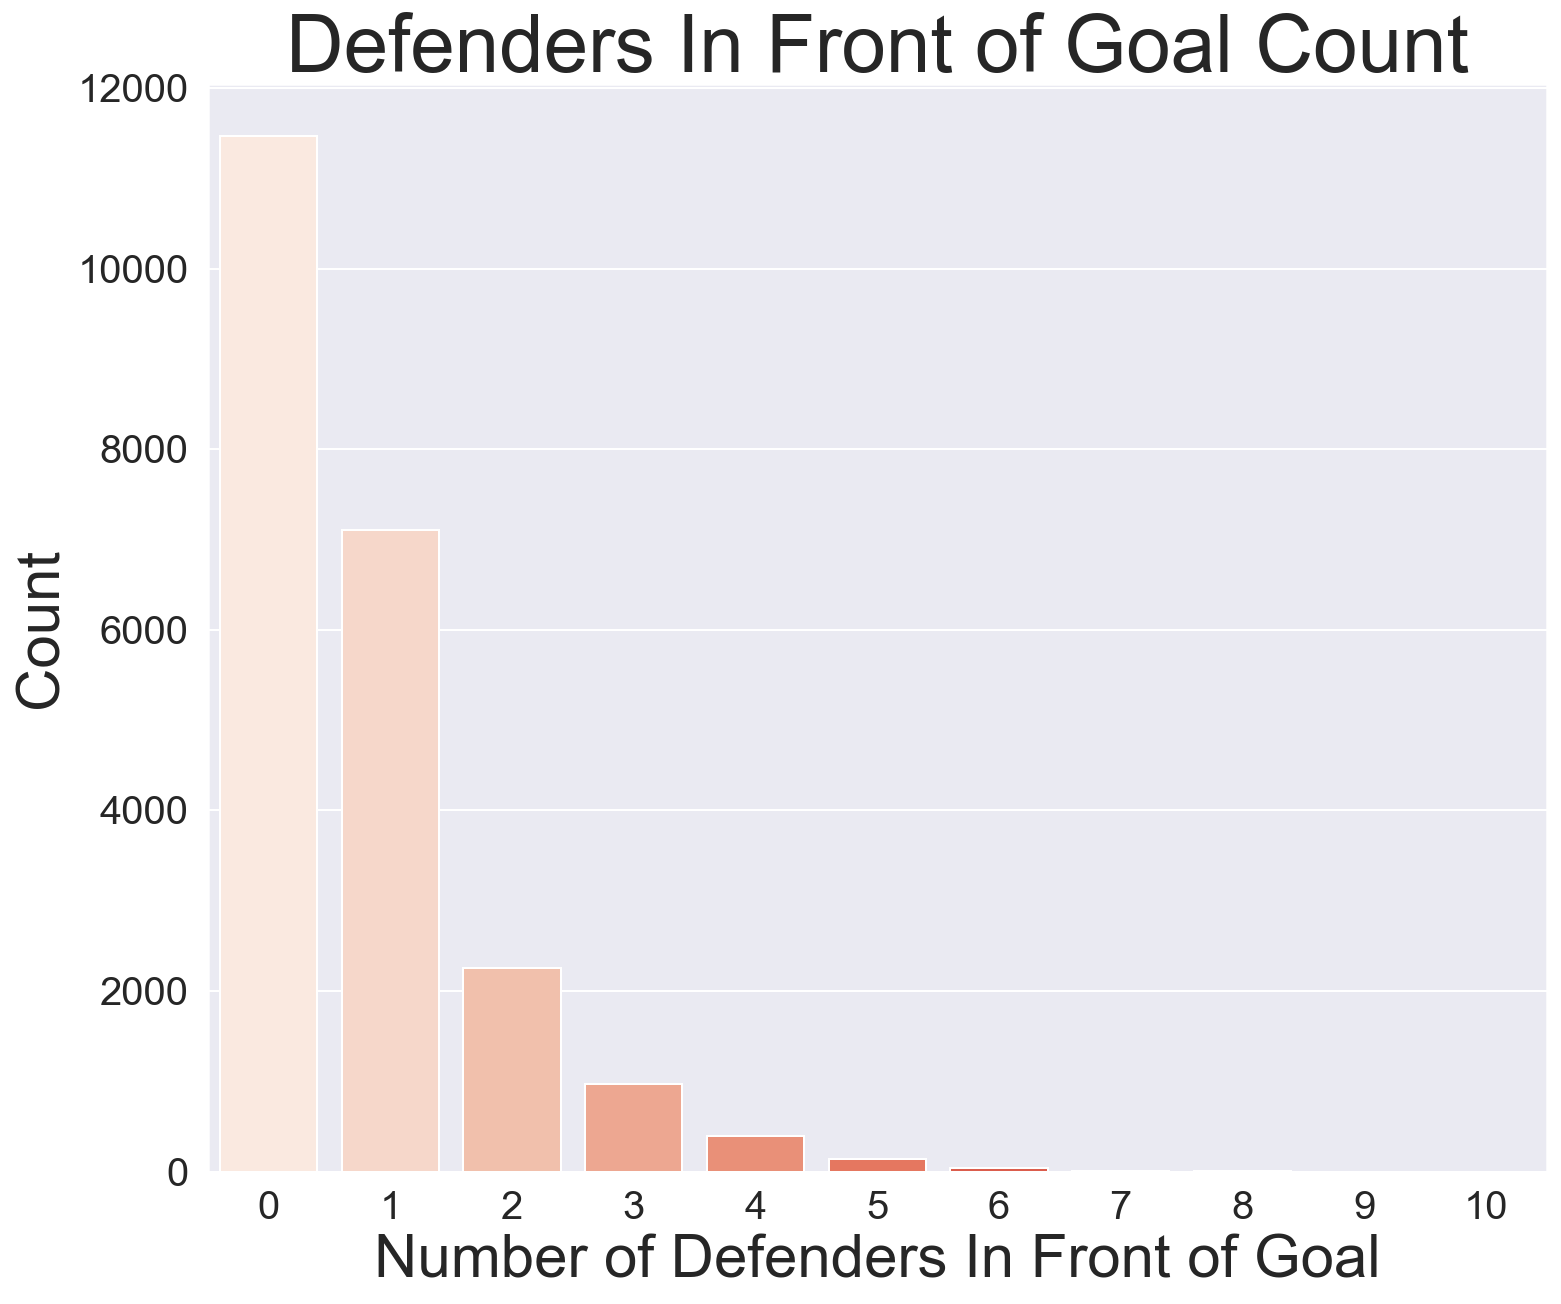

In [42]:
# plots bar plot of count per number of defenders in front of goal
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x='defenders_infront_of_goal', y='count', data=df_def_hist, palette='Reds')
ax.set_title("Defenders In Front of Goal Count",fontsize=40)
ax.set_xlabel("Number of Defenders In Front of Goal",fontsize=30)
ax.set_ylabel("Count",fontsize=30) 
ax.tick_params(labelsize=20)
plt.show()

# Area Of Goal

In [43]:
# Creates dataframe of area of goal and shot outcome
df_area = df[['area_of_goal','shot_outcome']]

In [44]:
# creates dataframe of area of goal and mean shot outcome giving conversion rates 
df_area = df_area.groupby('area_of_goal').mean()
# inserts column for index so number of defenders become their own column
df_area = df_area.reset_index(drop=False)

In [46]:
# un-abbreviates area catergories 
df_area.replace(to_replace='BL', value = 'Bottom Left', inplace = True)
df_area.replace(to_replace='BM', value = 'Bottom Middle', inplace = True)
df_area.replace(to_replace='BR', value = 'Bottom Right', inplace = True)
df_area.replace(to_replace='TL', value = 'Top Left', inplace = True)
df_area.replace(to_replace='TM', value = 'Top Middle', inplace = True)
df_area.replace(to_replace='TR', value = 'Top Right', inplace = True)
df_area.replace(to_replace='OFF_TARGET', value = 'Off Target', inplace = True)

In [47]:
# renames shout_outcome to conversion_rate
df_area.columns = ['area_of_goal','conversion_rate']

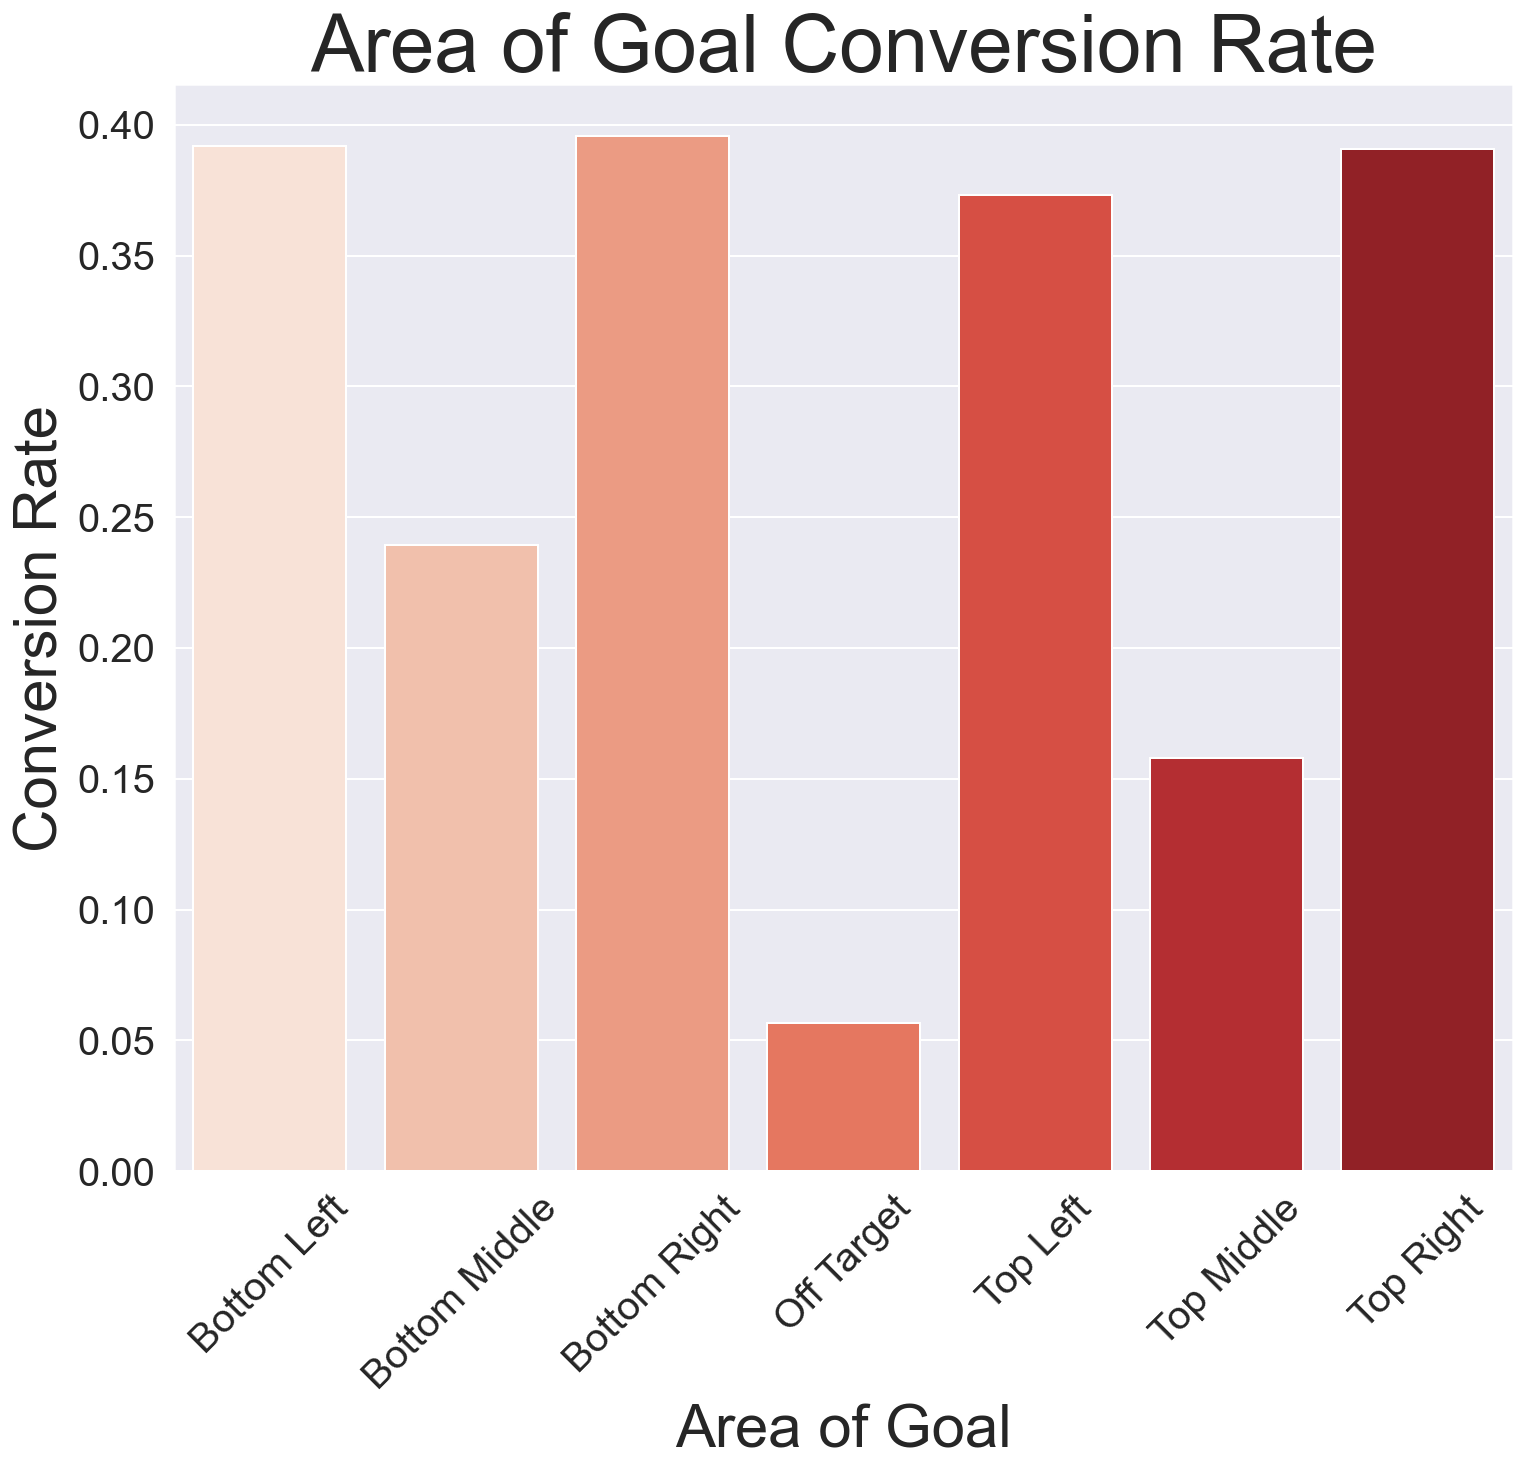

In [48]:
# plots bar chart for area of goal conversion rates
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x='area_of_goal', y='conversion_rate', data=df_area, palette='Reds')
ax.set_title("Area of Goal Conversion Rate",fontsize=40)
ax.set_xlabel("Area of Goal",fontsize=30)
plt.xticks(rotation=45)
ax.set_ylabel("Conversion Rate",fontsize=30) 
ax.tick_params(labelsize=20)
plt.show()

# Area of Goal KDE Plot

In [49]:
# Createss data frame with shot_end_location, area of goal and shout outcome
df_area_kde = df[['shot_end_location', 'area_of_goal','shot_outcome']]

In [50]:
# creates columns for x and y co-ordinates for area of goal kde plot
df_area_kde['end_location_x'] = df_area_kde.shot_end_location.apply(pull_x)
df_area_kde['end_location_y'] = df_area_kde.shot_end_location.apply(pull_y)

<ipython-input-50-9e3616492557>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area_kde['end_location_x'] = df_area_kde.shot_end_location.apply(pull_x)
<ipython-input-50-9e3616492557>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area_kde['end_location_y'] = df_area_kde.shot_end_location.apply(pull_y)


In [51]:
# creates data frame of on target goals sucsessful goal
df_area_kde = df_area_kde[( df_area_kde.area_of_goal != 'OFF_TARGET') & ( df_area_kde.shot_outcome == 1)]

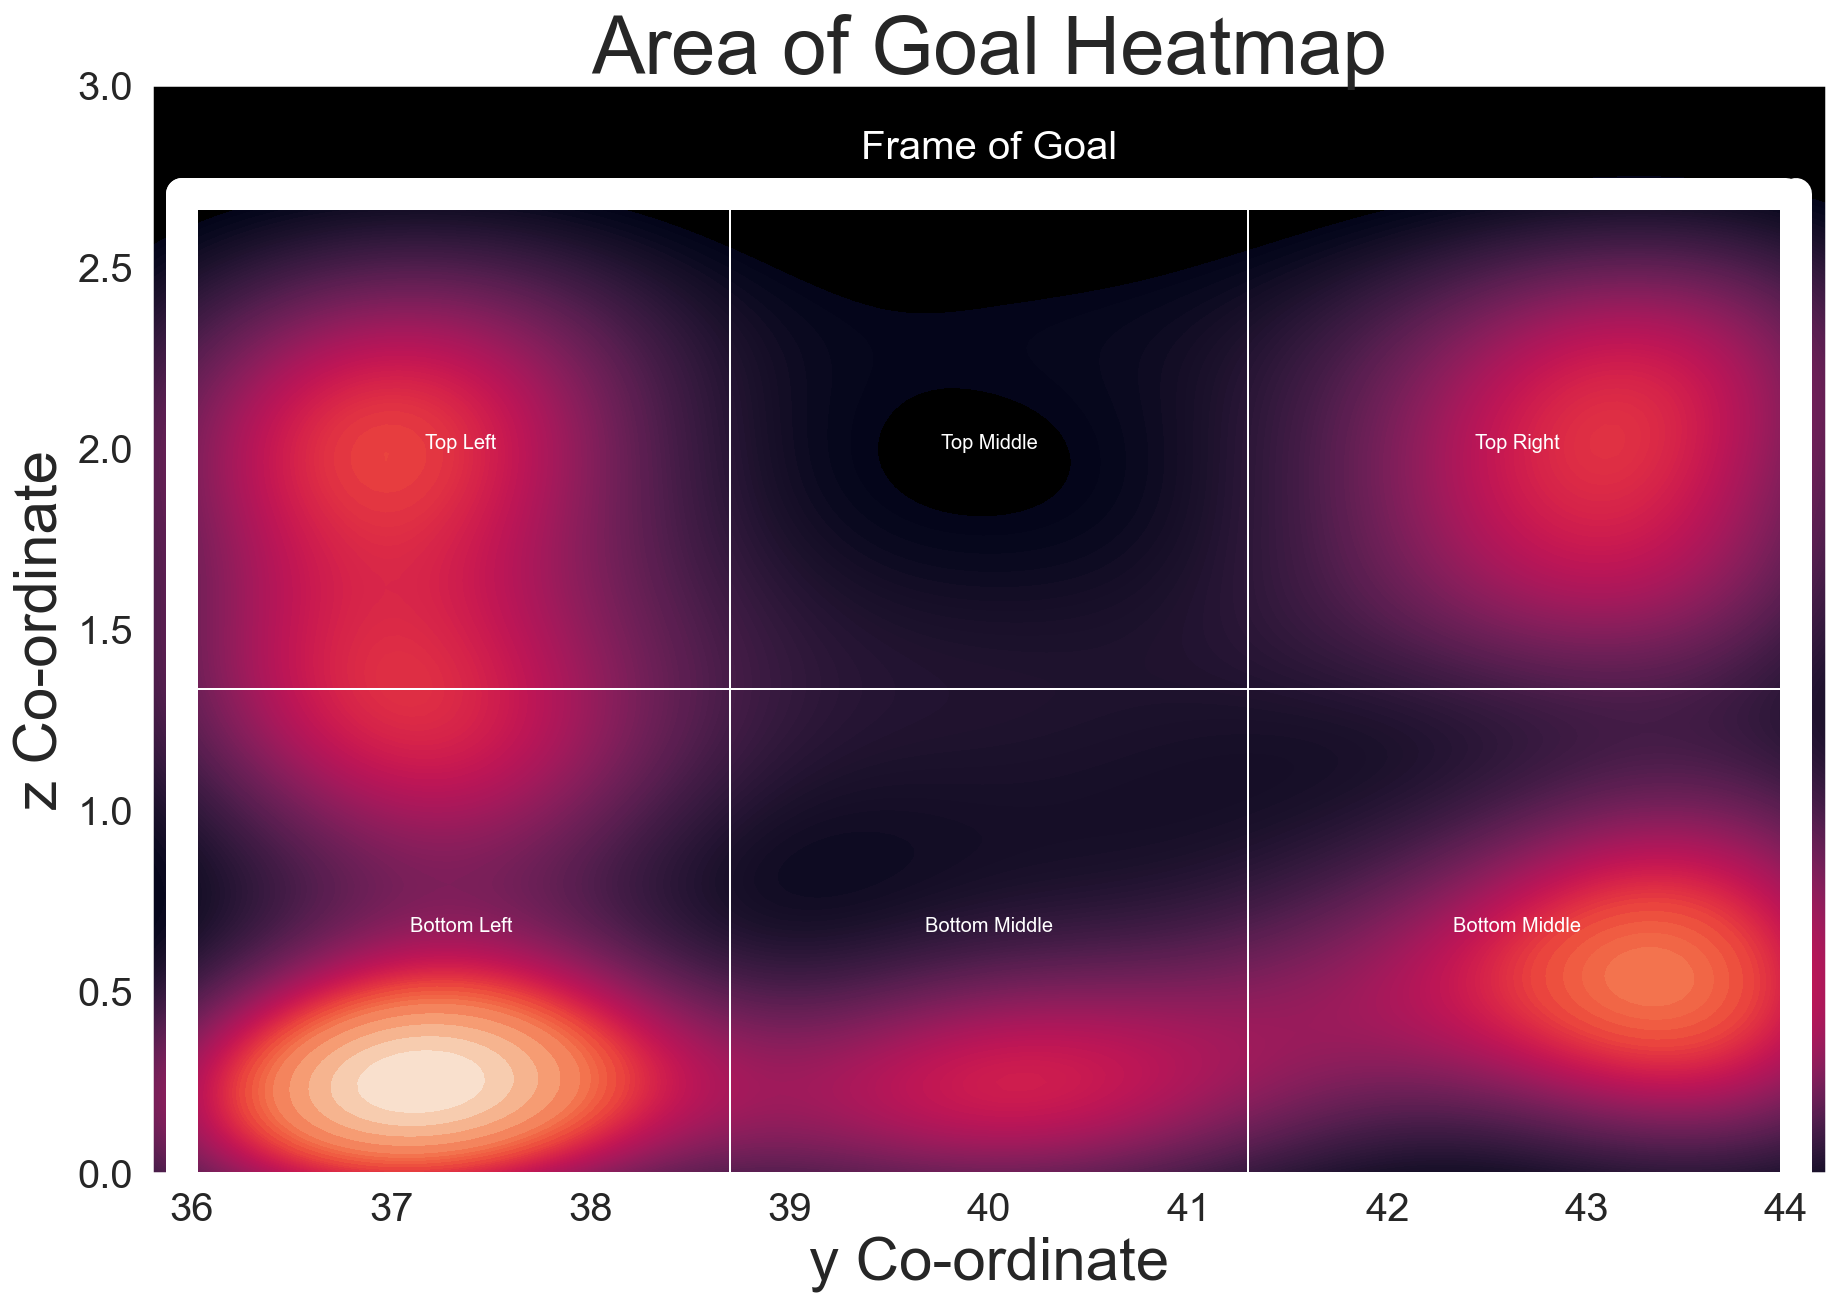

In [52]:
# plots kde area of goal heatmap 
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.kdeplot(data=df_area_kde, x='end_location_x', y='end_location_y', levels=100, fill=True, cmap = "rocket")
ax.set_title("Area of Goal Heatmap",fontsize=40)
ax.set_xlabel("y Co-ordinate",fontsize=30)
ax.set_ylabel("z Co-ordinate",fontsize=30) 
ax.tick_params(labelsize=20)
# sets background to black 
ax.patch.set_facecolor('black')
# removes grid lines
ax.grid(False)

# Plots white goal frame with label
plt.ylim(0, 3)
plt.xlim(35.8, 44.2)
plt.text(40, 2.8,'Frame of Goal', horizontalalignment='center', color = 'white', fontsize=20)
plt.plot([35.95,44], [2.7,2.7], lw=16, color ='white')
plt.plot([35.95,35.95], [0,2.7], lw=16, color ='white')
plt.plot([44.05,44.05], [0,2.7], lw=16, color ='white')

# Top left label 
TL = matplotlib.patches.Rectangle((36, 1.335), 2.7, 2.67-1.335, fill = False, color ='white') 
plt.text(37.35, 2,'Top Left', horizontalalignment='center',color ='white',fontsize=10)

# Bottom left label
BL = matplotlib.patches.Rectangle((36,0), 2.7, 1.335, fill = False, color ='white')
plt.text(37.35, 0.667,'Bottom Left', horizontalalignment='center',color ='white')

# Top middle label
TM = matplotlib.patches.Rectangle((38.7,1.335), 2.6, 2.67-1.335, fill = False, color ='white')
plt.text(40, 2,'Top Middle', horizontalalignment='center',color ='white')

# Bottum middle label
BM = matplotlib.patches.Rectangle((38.7,0), 2.6, 2.67-1.335, fill = False, color ='white')
plt.text(40, 0.667,'Bottom Middle', horizontalalignment='center',color ='white')

# Top right label
TR = matplotlib.patches.Rectangle((41.3,1.335), 2.7, 2.67-1.335, fill = False, color ='white')
plt.text(42.65, 2,'Top Right', horizontalalignment='center',color ='white')

# Bottum right label
BR = matplotlib.patches.Rectangle((41.3,0), 2.7, 1.335, fill = False, color ='white')
plt.text(42.65, 0.667,'Bottom Middle', horizontalalignment='center',color ='white')

ax.add_patch(TL) 
ax.add_patch(BL) 
ax.add_patch(TM)
ax.add_patch(BM)
ax.add_patch(TR)
ax.add_patch(BR)

plt.show()